# Your mission

You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

In [2]:
import os
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


# Data Exploration

In this section, you are to explore the data. You are to fulfill the following tasks:
- **Univariate analysis**
    - study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity 
    - **Tips**: you can analyse ACF, PACF plots, perform Augmented Dickey-Fuller test
- **Multivariate analysis**
    - study other blockchain variables, retrieve insights
    - study the correlation between the Bitcoin market price and other blockchain variables 
    - **Tips**: Pearson correlation

In [3]:
df = pd.read_csv("data/bilan-electrique.csv")

## Train test split

In [4]:
len(df)

10000

In [10]:
X_train = 
X_test = hf.data_split(df_blockchain)

# Modeling with ARIMA
In this section, you are to perform some classical modelings, the suggested method here is ARIMA, but you can try other models such as ARMA, ARIMAX, SARIMAX...

## Modeling
The following code allows ARIMA modeling with one combination of (p,d,q).

In [11]:
#If you need information about the function, you can display the docstring
hf.evaluate_arima_model?

In [5]:
parameters = (2,1,1)
errors, predictions = evaluate_arima_model(X_train["market-price"], 
                                              X_test["market-price"], parameters )
errors

NameError: ignored

## Search for the best ARIMA model
We use grid search to search for the best ARIMA parameters that gives the lowest error. This follows the Box-Jenkins methology.

In [1]:
cfg =[]
score = []
for p in range(1,3):
  for i in range(0,3):
    for q in range(0,3):
      cfg.append(hf.arima_grid_search(X_train["market-price"],
                                            X_test["market-price"],
                                            p,i,q)[0])
      score.append(hf.arima_grid_search(X_train["market-price"],
                                            X_test["market-price"],
                                            p,i,q)[1])
cfg, score


NameError: ignored

In [22]:
print(best_cfg, best_score)

(1, 1, 2) 2853.0350638188083


## Visualization
To have a better view on the difference between true and predict values, we visualize them by plotting both the signals.

In [17]:
# prepare the dataset for plotting
predict_date = df_blockchain["Date"]
df_predict = pd.DataFrame(zip(predict_date,
                              predictions, X_test["market-price"].values),
                          columns=["date", "predict", "true"])

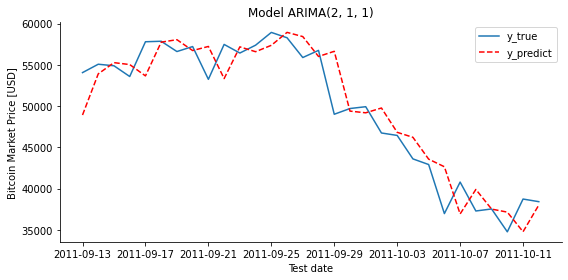

In [18]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, len(new_ticks), freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMA{parameters}")
sns.despine()
plt.legend()
plt.tight_layout()
